In [19]:
import pandas_datareader.data as web
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np

In [20]:
dis = pd.read_csv("../../store.csv",header=0,index_col=0)
dis["Date"] = pd.to_datetime(dis["Date"])
dis.set_index('Date', inplace=True)
dis.pop('Volume')
dis = dis.resample('w').mean()
dis.head(10)

,Open,High,Low,Close
Date,,,,
2014-04-13,12879.800,12995.250000,12829.600000,12894.800000
2014-04-20,12650.800,12792.566667,12522.433333,12643.433333
2014-04-27,12982.650,13121.900000,12919.850000,13025.550000
2014-05-04,13003.225,13084.175000,12845.625000,12922.450000
2014-05-11,12950.800,13184.160000,12907.680000,13114.560000
2014-05-18,14211.280,14576.880000,14119.500000,14309.420000
2014-05-25,15122.380,15264.100000,14977.600000,15125.300000
2014-06-01,15182.280,15257.600000,14930.700000,15051.380000
2014-06-08,15200.000,15409.180000,15112.580000,15340.700000


In [21]:
returns = 100*dis.Close.pct_change().dropna()
returns

Date
2014-04-20   -1.949365
2014-04-27    3.022254
2014-05-04   -0.791521
2014-05-11    1.486638
2014-05-18    9.110942
                ...   
2024-03-17   -1.497509
2024-03-24   -0.917265
2024-03-31    0.586003
2024-04-07    2.185121
2024-04-14    1.662681
Freq: W-SUN, Name: Close, Length: 522, dtype: float64

Text(0, 0.5, '% Return')

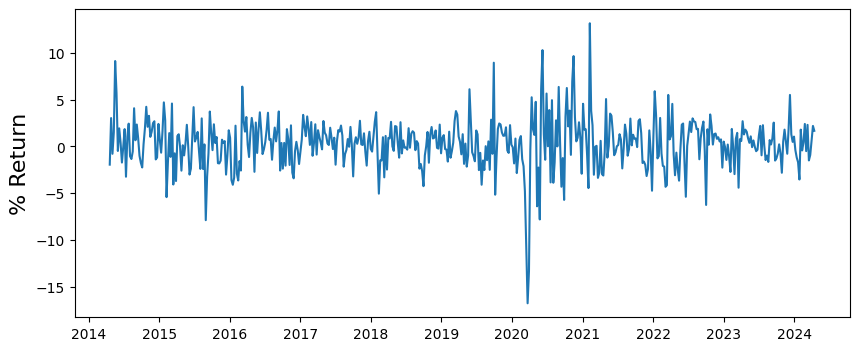

In [22]:
plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel('% Return', fontsize=16)
# plt.title('Returns', fontsize=20)

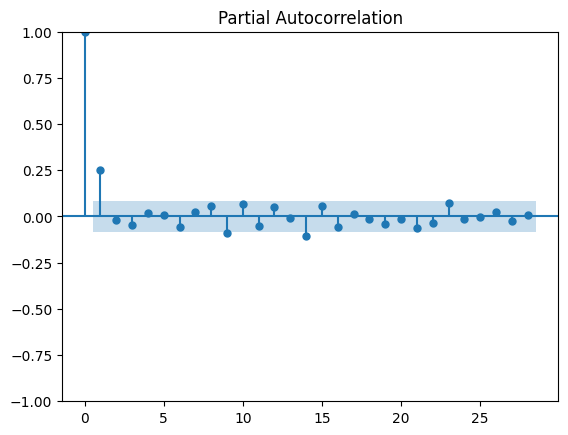

In [24]:
plot_pacf(returns)
plt.show()

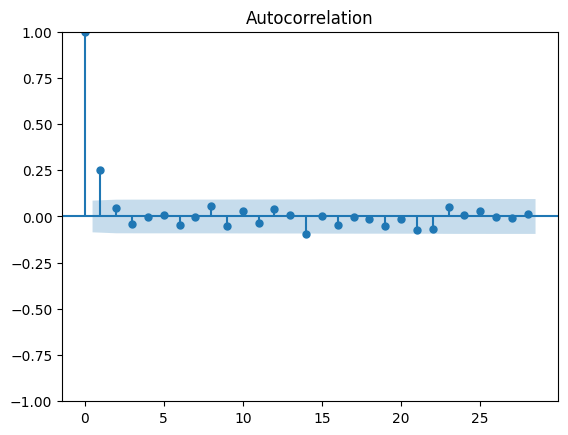

In [25]:
plot_acf(returns)
plt.show()

In [26]:
model = arch_model(returns, p=14, q=14)

In [27]:
model_fit = model.fit()

Iteration:      1,   Func. Count:     32,   Neg. LLF: 11061.013058217053
Iteration:      2,   Func. Count:     64,   Neg. LLF: 7279.006052957504
Iteration:      3,   Func. Count:     97,   Neg. LLF: 972757.6267044123
Iteration:      4,   Func. Count:    130,   Neg. LLF: 1952.243018311176
Iteration:      5,   Func. Count:    162,   Neg. LLF: 1234.275521824074
Iteration:      6,   Func. Count:    194,   Neg. LLF: 1195.6635543548705
Iteration:      7,   Func. Count:    226,   Neg. LLF: 1216.5623277262002
Iteration:      8,   Func. Count:    259,   Neg. LLF: 1194.7683749032085
Iteration:      9,   Func. Count:    291,   Neg. LLF: 1240.4223804950952
Iteration:     10,   Func. Count:    323,   Neg. LLF: 1259.398872020815
Iteration:     11,   Func. Count:    355,   Neg. LLF: 1186.6406015174925
Iteration:     12,   Func. Count:    387,   Neg. LLF: 1186.3103118631902
Iteration:     13,   Func. Count:    419,   Neg. LLF: 1184.0186784594875
Iteration:     14,   Func. Count:    451,   Neg. LLF: 11

In [28]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1176.09
Distribution:                  Normal   AIC:                           2412.18
Method:            Maximum Likelihood   BIC:                           2539.91
                                        No. Observations:                  522
Date:                Tue, Apr 30 2024   Df Residuals:                      521
Time:                        23:48:46   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.3268      0.113      2.891  3.836e-03 [  0.105,  0.548]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.9774      1.245      0.785      0.433    [ -1.463,  3.418]
alpha[1]       0.2407      0.147      1.637      0.102 [-4.749e-02,  0.529]
alpha[2]   5.2520e-03      0.176  2.986e-02      0.976    [ -0.339,  0.350]
alpha[3]       0.0238      0.228      0.104      0.917    [ -0.422,  0.470]
alpha[4]   9.4022e-12      0.231  4.077e-11      1.000    [ -0.452,  0.452]
alpha[5]   6.6999e-12      0.174  3.847e-11      1.000    [ -0.341,  0.341]
alpha[6]       0.2185      0.189      1.156      0.248    [ -0.152,  0.589]
alpha[7]   1.0263e-11      0.193  5.325e-11      1.000    [ -0.378,  0.378]
alpha[8]   2.1328e-11      0.192  1.113e-10      1.000    [ -0.376,  0.376]
alpha[9]       0.2425      0.242      1.003      0.316    [ -0.231,  0.716]
alpha[10]  1.0929e-11      0.312  3.498e-11      1.000    [ -0.612,  0.612]
alpha[11]  2.8246e-12      0.223  1.267e-11      1.000    [ -0.437,  0.437]
alpha[12]      0.0463      0.280      0.165      0.869    [ -0.502,  0.594]
alpha[13]      0.0000      0.171      0.000      1.000    [ -0.335,  0.335]
alpha[14]  4.7770e-11      0.126  3.777e-10      1.000    [ -0.248,  0.248]
beta[1]        0.0000      0.487      0.000      1.000    [ -0.955,  0.955]
beta[2]    5.0797e-12      0.666  7.627e-12      1.000    [ -1.305,  1.305]
beta[3]        0.0000      0.695      0.000      1.000    [ -1.363,  1.363]
beta[4]    3.9754e-12      0.672  5.920e-12      1.000    [ -1.316,  1.316]
beta[5]    8.8919e-12      0.393  2.260e-11      1.000    [ -0.771,  0.771]
beta[6]        0.0509      0.579  8.795e-02      0.930    [ -1.083,  1.185]
beta[7]    3.1001e-12      0.488  6.348e-12      1.000    [ -0.957,  0.957]
beta[8]        0.0000      0.340      0.000      1.000    [ -0.666,  0.666]
beta[9]        0.0826      0.260      0.318      0.751    [ -0.427,  0.592]
beta[10]       0.0000      0.342      0.000      1.000    [ -0.671,  0.671]
beta[11]       0.0000      0.234      0.000      1.000    [ -0.459,  0.459]
beta[12]       0.0000      0.217      0.000      1.000    [ -0.425,  0.425]
beta[13]   3.7393e-12      0.391  9.575e-12      1.000    [ -0.765,  0.765]
beta[14]   1.2087e-10      0.246  4.911e-10      1.000    [ -0.482,  0.482]
===========================================================================

Covariance estimator: robust
"""

In [29]:
rolling_predictions = []
test_size = 365

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, p=1, q=1)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

In [30]:
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-365:])

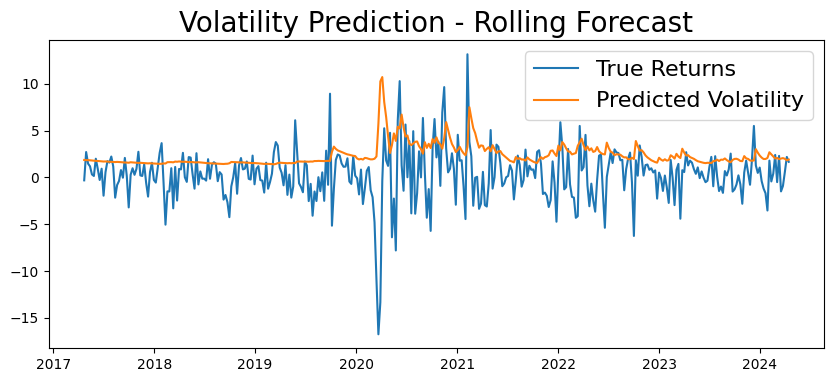

In [31]:
plt.figure(figsize=(10,4))
true, = plt.plot(returns[-365:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=16)

In [32]:
start = datetime(2000, 1, 1)
end = datetime(2020, 6, 10)

In [33]:
spy = pd.read_csv("../../store.csv",header=0,index_col=0)
spy["Date"] = pd.to_datetime(spy["Date"])
spy.set_index('Date', inplace=True)
spy.head(10)

,Open,High,Low,Close,Volume
Date,,,,,
2014-04-10,12937.4,13055.6,12881.2,12949.4,0
2014-04-11,12822.2,12934.9,12778.0,12840.2,0
2014-04-15,12830.5,12831.6,12537.7,12579.9,0
2014-04-16,12557.4,12727.0,12514.8,12563.2,0
2014-04-17,12564.5,12819.1,12514.8,12787.2,0
2014-04-21,12845.3,13002.8,12838.8,12958.5,0
2014-04-22,12989.5,13040.2,12913.9,12987.1,0
2014-04-23,12961.3,13176.0,12957.9,13122.1,0
2014-04-25,13134.5,13268.6,12968.8,13034.5,0


In [34]:
returns = 100 * spy.Close.pct_change().dropna()

Text(0.5, 1.0, 'SPY Returns')

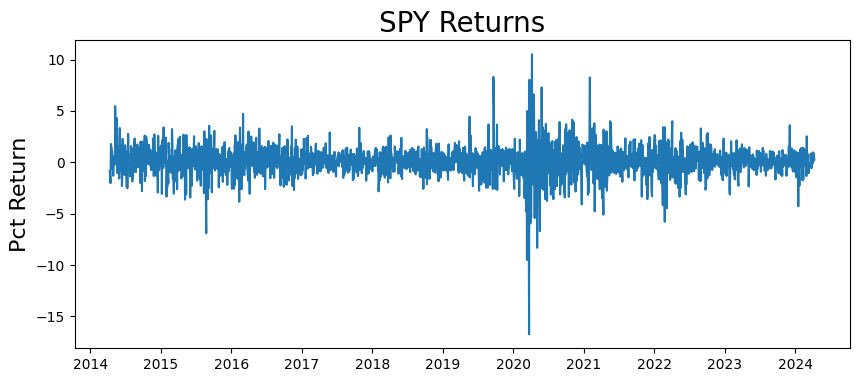

In [35]:
plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel('Pct Return', fontsize=16)
plt.title('SPY Returns', fontsize=20)

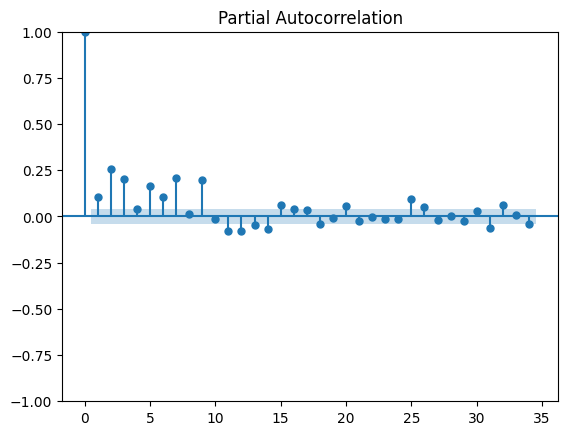

In [36]:
plot_pacf(returns**2)
plt.show()

In [37]:
model = arch_model(returns, p=2, q=2)

In [38]:
model_fit = model.fit()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 3309094231716.9014
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1986920923.8712919
Iteration:      3,   Func. Count:     29,   Neg. LLF: 5467.671657338031
Iteration:      4,   Func. Count:     38,   Neg. LLF: 3990.128853563045
Iteration:      5,   Func. Count:     46,   Neg. LLF: 3978.4925590865264
Iteration:      6,   Func. Count:     54,   Neg. LLF: 3978.7267141954158
Iteration:      7,   Func. Count:     62,   Neg. LLF: 3974.9486520078067
Iteration:      8,   Func. Count:     70,   Neg. LLF: 3980.1134371050084
Iteration:      9,   Func. Count:     78,   Neg. LLF: 3978.4689006691856
Iteration:     10,   Func. Count:     86,   Neg. LLF: 3960.979041692734
Iteration:     11,   Func. Count:     94,   Neg. LLF: 3961.8549480859665
Iteration:     12,   Func. Count:    102,   Neg. LLF: 3966.1432414331302
Iteration:     13,   Func. Count:    110,   Neg. LLF: 3958.416695243433
Iteration:     14,   Func. Count:    117,   Neg. LLF: 3

In [39]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -3956.53
Distribution:                  Normal   AIC:                           7925.07
Method:            Maximum Likelihood   BIC:                           7959.94
                                        No. Observations:                 2469
Date:                Tue, Apr 30 2024   Df Residuals:                     2468
Time:                        23:49:53   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0923  2.227e-02      4.145  3.399e-05 [4.865e-02,  0.136]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0464  1.645e-02      2.824  4.745e-03 [1.421e-02,7.867e-02]
alpha[1]       0.1014  3.967e-02      2.556  1.058e-02   [2.366e-02,  0.179]
alpha[2]       0.0475  5.821e-02      0.815      0.415  [-6.663e-02,  0.162]
beta[1]    8.6264e-15      0.315  2.740e-14      1.000     [ -0.617,  0.617]
beta[2]        0.8285      0.294      2.819  4.817e-03     [  0.252,  1.405]
============================================================================

Covariance estimator: robust
"""

In [40]:
rolling_predictions = []
test_size = 365*5

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, p=2, q=2)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

In [41]:
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-365*5:])

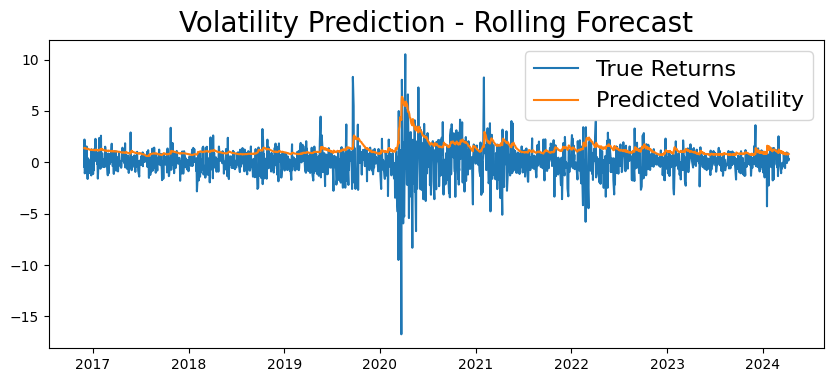

In [42]:
plt.figure(figsize=(10,4))
true, = plt.plot(returns[-365*5:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=16)

In [43]:
train = returns
model = arch_model(train, p=2, q=2)
model_fit = model.fit(disp='off')

In [44]:
from dateutil.relativedelta import relativedelta

In [45]:
pred = model_fit.forecast(horizon=7)
# returns.head()
future_dates = [returns.index[-1] + relativedelta(days=i) for i in range(1,8)]
pred = pd.Series(np.sqrt(pred.variance.values[-1,:]), index=future_dates)

Text(0.5, 1.0, 'Volatility Prediction - Next 7 Days')

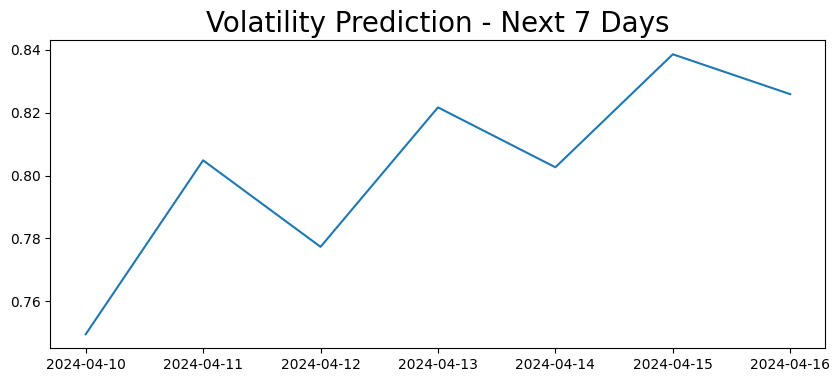

In [46]:
plt.figure(figsize=(10,4))
plt.plot(pred)
plt.title('Volatility Prediction - Next 7 Days', fontsize=20)